## AfSIS Soil Chemistry Dataset (Open Data on AWS)

### Packages to install:

In [2]:
! pip install awscli brukeropusreader tqdm pandas matplotlib folium seaborn scikit-learn

### Downloading data:

In [ ]:
! aws s3 sync s3://afsis afsis --no-sign-request

### 1) GEOGRAPHICAL REFERENCES

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
GEOREFS_FILE = 'afsis/2009-2013/Georeferences/georeferences.csv'
georefs_df = pd.read_csv(GEOREFS_FILE)
georefs_df

SSN  Public   Latitude  Longitude  Cluster  Plot Depth  \
0     icr025136    True  -6.851620  34.243313       16     7   sub   
1     icr068579    True  11.280658   8.166768        9     1   top   
2     icr048978    True -29.972100  22.710200        1     1   sub   
3     icr056481    True -16.066365  28.326498       15     1   sub   
4     icr034190    True   8.158693   9.930640       15     1   top   
...         ...     ...        ...        ...      ...   ...   ...   
1838  icr010866    True  12.470887  -6.281817       10     1   sub   
1839  icr023393    True -13.402780  35.523077       15     1   top   
1840  icr056121    True -13.127745  28.517113       13     1   top   
1841  icr023373    True -13.418417  35.521103       14     1   top   
1842  icr034441    True   7.001200   9.357102       10     1   top   

                        Soil material        Scientist          Site  \
0                                 NaN        Tor Vagen        Itende   
1      Pamp.9.1.Topsoil.Std fine soil    Jerome Tondoh      Pampaida   
2      Prie.1.1.Subsoil.Std fine soil  George Van Zijl       Prieska   
3     Mong.15.1.Subsoil.Std fine soil        L.T.Desta         Monga   
4      Ibi.15.1.Topsoil.Std fine soil    Jerome Tondoh           Ibi   
...                               ...              ...           ...   
1838   Kol.10.1.Subsoil.Std fine soil    Jerome Tondoh        Koloko   
1839   Mak.15.1.Topsoil.Std fine soil     Dr L.T.Desta  Macassangila   
1840  Fise.13.1.Topsoil.Std fine soil        L.T.Desta       Fisenge   
1841   Mak.14.1.Topsoil.Std fine soil     Dr L.T.Desta  Macassangila   
1842  Kats.10.1.Topsoil.Std fine soil    Jerome Tondoh   Katsina ala   

           Country        Region Cultivated   Gid  
0         Tanzania   East Africa      False   599  
1          Nigeria   West Africa        NaN  1487  
2     South Africa  South Africa      False   786  
3           Zambia  South Africa       True  1065  
4          Nigeria   West Africa       True   655  
...            ...           ...        ...   ...  
1838          Mali   West Africa       True   246  
1839    Mozambique  South Africa       True   410  
1840        Zambia  South Africa      False  1028  
1841    Mozambique  South Africa       True   407  
1842       Nigeria   West Africa       True   677  

[1843 rows x 14 columns]

In [8]:
georefs_df.Country

0           Tanzania
1            Nigeria
2       South Africa
3             Zambia
4            Nigeria
            ...     
1838            Mali
1839      Mozambique
1840          Zambia
1841      Mozambique
1842         Nigeria
Name: Country, Length: 1843, dtype: object

In [9]:
georefs_df_prueba = georefs_df.loc[:, 'Country'] == 'Niger' 
df_prueba = georefs_df.loc[georefs_df_prueba]
df_prueba

SSN  Public   Latitude  Longitude  Cluster  Plot Depth  \
40    icr068150    True  13.418405   1.731593        3     6   sub   
59    icr068221    True  13.413398   1.754712        7     2   top   
145   icr068339    True  13.371998   1.804517       13     1   top   
196   icr068301    True  13.419078   1.786608       11     2   top   
203   icr068161    True  13.435553   1.738738        4     2   top   
228   icr068265    True  13.371465   1.779663        9     4   top   
256   icr068399    True  13.431220   1.799123       16     1   top   
324   icr068132    True  13.393575   1.735128        2     7   sub   
421   icr068131    True  13.393575   1.735128        2     7   top   
449   icr068340    True  13.371998   1.804517       13     1   sub   
468   icr068382    True  13.404805   1.802672       15     2   sub   
514   icr068279    True  13.389917   1.779190       10     1   top   
574   icr068362    True  13.385682   1.798298       14     2   sub   
589   icr068361    True  13.385682   1.798298       14     2   top   
667   icr068321    True  13.437860   1.777962       12     2   top   
695   icr068101    True  13.367585   1.735377        1     2   top   
751   icr068182    True  13.375718   1.759763        5     2   sub   
781   icr068381    True  13.404805   1.802672       15     2   top   
951   icr068199    True  13.395040   1.756920        6     1   top   
1082  icr068302    True  13.419078   1.786608       11     2   sub   
1089  icr068222    True  13.413398   1.754712        7     2   sub   
1153  icr068240    True  13.443970   1.754627        8     1   sub   
1217  icr068162    True  13.435553   1.738738        4     2   sub   
1290  icr068280    True  13.389917   1.779190       10     1   sub   
1295  icr068239    True  13.443970   1.754627        8     1   top   
1342  icr068102    True  13.367585   1.735377        1     2   sub   
1394  icr068322    True  13.437860   1.777962       12     2   sub   
1599  icr068266    True  13.371465   1.779663        9     4   sub   
1660  icr068181    True  13.375718   1.759763        5     2   top   
1670  icr068149    True  13.418405   1.731593        3     6   top   
1679  icr068400    True  13.431220   1.799123       16     1   sub   
1813  icr068200    True  13.395040   1.756920        6     1   sub   

                        Soil material      Scientist       Site Country  \
40     Nyal.3.6.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
59     Nyal.7.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
145   Nyal.13.1.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
196   Nyal.11.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
203    Nyal.4.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
228    Nyal.9.4.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
256   Nyal.16.1.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
324    Nyal.2.7.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
421    Nyal.2.7.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
449   Nyal.13.1.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
468   Nyal.15.2.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
514   Nyal.10.1.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
574   Nyal.14.2.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
589   Nyal.14.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
667   Nyal.12.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
695    Nyal.1.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
751    Nyal.5.2.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
781   Nyal.15.2.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
951    Nyal.6.1.Topsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
1082  Nyal.11.2.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
1089   Nyal.7.2.Subsoil.Std fine soil  Jerome Tondoh  Nyalagari   Niger   
1153   Nyal.8.1.Subsoil.Std fine soil  Jerome Tondo

In [10]:
georefs_df.count()

SSN              1843
Public           1843
Latitude         1843
Longitude        1843
Cluster          1843
Plot             1843
Depth            1843
Soil material    1749
Scientist        1843
Site             1843
Country          1843
Region           1611
Cultivated       1045
Gid              1843
dtype: int64

In [12]:
### LOCALIZACIÓN DE LAS MUESTRAS 

import folium
map = folium.Map(location=[-3.5, 35.6], tiles="Stamen Terrain", zoom_start=3)
 
for _, row in georefs_df.iterrows():
    if row[['Latitude', 'Longitude']].notnull().all():
        folium.Marker([row['Latitude'], 
                       row['Longitude']], 
                      popup=row['SSN']
                     ).add_to(map)

map


In [14]:
### **UNIR 1**

COORDENADAS_DF = georefs_df.loc[:,['SSN','Latitude', 'Longitude', 'Site', 'Country']]
COORDENADAS_DF

SSN   Latitude  Longitude          Site       Country
0     icr025136  -6.851620  34.243313        Itende      Tanzania
1     icr068579  11.280658   8.166768      Pampaida       Nigeria
2     icr048978 -29.972100  22.710200       Prieska  South Africa
3     icr056481 -16.066365  28.326498         Monga        Zambia
4     icr034190   8.158693   9.930640           Ibi       Nigeria
...         ...        ...        ...           ...           ...
1838  icr010866  12.470887  -6.281817        Koloko          Mali
1839  icr023393 -13.402780  35.523077  Macassangila    Mozambique
1840  icr056121 -13.127745  28.517113       Fisenge        Zambia
1841  icr023373 -13.418417  35.521103  Macassangila    Mozambique
1842  icr034441   7.001200   9.357102   Katsina ala       Nigeria

[1843 rows x 5 columns]

### 2) CHEMISTRY ELEMENTS

In [17]:
WET_CHEM_PATH2 = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
wet_chem_df2 = pd.read_csv(WET_CHEM_PATH2)
wet_chem_df2

SSN  Public     EC  ExAc      ExBas   M3 Al    M3 B   M3 Ca  \
0     icr006475    True  0.053  2.56   2.744241  1095.0  0.3337   207.1   
1     icr006586    True  0.193  0.59  16.797753  1165.0  0.7899  1665.0   
2     icr007929    True  0.305  0.19  16.503619   727.6  0.6142  2518.0   
3     icr008008    True  0.053  0.48   6.302775  1458.0  0.3603   734.3   
4     icr010198    True  0.032  1.05   2.390303  2166.0  0.0100   261.8   
...         ...     ...    ...   ...        ...     ...     ...     ...   
1902  icr076602    True  0.060  0.43   5.456131  1940.0  0.0010   782.0   
1903  icr076621    True  0.057  0.33   2.542618  1890.0  0.0590   309.0   
1904  icr076622    True  0.028  0.24   1.333687  1850.0  0.0010   148.0   
1905  icr076641    True  0.127  0.24   7.206574  1810.0  0.0380  1100.0   
1906  icr076640    True  0.144  0.24   7.460270  1700.0  0.0200  1130.0   

       M3 Cu   M3 Fe     M3 K  M3 Mg    M3 Mn   M3 Na     M3 P    M3 S  M3 Zn  \
0     1.3150  153.70   306.30   89.5    9.266   42.71    4.495  18.960  2.825   
1     2.8140  126.80  1186.00  636.7  254.700   40.83   12.510  13.600  1.952   
2     0.2496  260.40    72.57  428.5   35.820   42.94   21.090  14.810  2.742   
3     1.3690  134.10   274.60  222.5   29.110   20.73  109.200  11.400  0.980   
4     1.6860   97.49    91.76   76.5  375.200   49.31    3.958   5.281  1.258   
...      ...     ...      ...    ...      ...     ...      ...     ...    ...   
1902  0.6700   54.80    50.00  119.0   17.100  100.00    1.430   5.620  1.000   
1903  0.0010   43.20   157.00   59.5   19.300   24.00    1.360   5.360  0.570   
1904  0.0010   40.00    80.50   30.3   12.800   31.60    0.310   3.770  0.330   
1905  0.6700   61.30    58.60  171.0    8.780   33.00    6.780   7.370  0.660   
1906  0.7800   66.50    63.60  182.0    8.460   33.00    7.200   6.960  0.320   

         PH         PSI  
0     4.682   67.052495  
1     7.062   30.420552  
2     7.114   60.506163  
3     5.650   51.470143  
4     5.501  247.626533  
...     ...         ...  
1902  5.430  403.000000  
1903  5.770  404.000000  
1904  6.000  422.000000  
1905  5.630  322.000000  
1906  5.620  405.000000  

[1907 rows x 19 columns]

In [18]:
wet_chem_df2.count()

SSN       1907
Public    1907
EC        1907
ExAc      1907
ExBas     1907
M3 Al     1907
M3 B      1907
M3 Ca     1907
M3 Cu     1907
M3 Fe     1907
M3 K      1907
M3 Mg     1907
M3 Mn     1907
M3 Na     1901
M3 P      1907
M3 S      1905
M3 Zn     1907
PH        1907
PSI       1907
dtype: int64

In [20]:
WET_CHEM2_DF = wet_chem_df2.loc[:,['SSN','EC','M3 P', 'M3 K', 'PH']]
WET_CHEM2_DF

SSN     EC     M3 P     M3 K     PH
0     icr006475  0.053    4.495   306.30  4.682
1     icr006586  0.193   12.510  1186.00  7.062
2     icr007929  0.305   21.090    72.57  7.114
3     icr008008  0.053  109.200   274.60  5.650
4     icr010198  0.032    3.958    91.76  5.501
...         ...    ...      ...      ...    ...
1902  icr076602  0.060    1.430    50.00  5.430
1903  icr076621  0.057    1.360   157.00  5.770
1904  icr076622  0.028    0.310    80.50  6.000
1905  icr076641  0.127    6.780    58.60  5.630
1906  icr076640  0.144    7.200    63.60  5.620

[1907 rows x 5 columns]

In [21]:
#definir función para clasificar columnas
def fosforo (x):
    if x ['M3 P'] > 108:
        val = 5             ### MUY ALTO
    elif x ['M3 P'] > 37:
        val = 4             ### ALTO
    elif x ['M3 P'] > 18:
        val = 3             ### MEDIO 
    elif x ['M3 P'] > 9:
        val = 2             ### BAJO 
    else:
        val = 1             ### MUY BAJO
    
    return val


def potasio (x):   
    if x ['M3 K'] > 350:
        val = 5
    elif x ['M3 K'] > 160:
        val = 4
    elif x ['M3 K'] > 100:
        val = 3
    elif x ['M3 K'] > 30:
        val = 2
    else:
        val = 1
    
    return val


def conductividad (x):        
    if x ['EC'] > 1:
        val = 'analizar salinidad'
    else:
        val = 'no salino'
       
    return val


def ph (x):        
    if x ['PH'] > 9:
        val = 5
    elif x ['PH'] > 7.5:
        val = 4
    elif x ['PH'] > 6.6:
        val = 3
    elif x ['PH'] > 5:
        val = 2
    else:
        val = 1
    
    return val

In [22]:
#crear columnas de clasificación usando la función anterior 

WET_CHEM2_MOD_DF = WET_CHEM2_DF
WET_CHEM2_MOD_DF['M3 P class'] = WET_CHEM2_MOD_DF.apply(fosforo, axis = 1)
WET_CHEM2_MOD_DF['M3 K class'] = WET_CHEM2_MOD_DF.apply(potasio, axis = 1)
WET_CHEM2_MOD_DF['EC class'] = WET_CHEM2_MOD_DF.apply(conductividad, axis = 1)
WET_CHEM2_MOD_DF['PH class'] = WET_CHEM2_MOD_DF.apply(ph, axis = 1)

WET_CHEM2_MOD_DF

SSN     EC     M3 P     M3 K     PH  M3 P class  M3 K class  \
0     icr006475  0.053    4.495   306.30  4.682           1           4   
1     icr006586  0.193   12.510  1186.00  7.062           2           5   
2     icr007929  0.305   21.090    72.57  7.114           3           2   
3     icr008008  0.053  109.200   274.60  5.650           5           4   
4     icr010198  0.032    3.958    91.76  5.501           1           2   
...         ...    ...      ...      ...    ...         ...         ...   
1902  icr076602  0.060    1.430    50.00  5.430           1           2   
1903  icr076621  0.057    1.360   157.00  5.770           1           3   
1904  icr076622  0.028    0.310    80.50  6.000           1           2   
1905  icr076641  0.127    6.780    58.60  5.630           1           2   
1906  icr076640  0.144    7.200    63.60  5.620           1           2   

       EC class  PH class  
0     no salino         1  
1     no salino         3  
2     no salino         3  
3     no salino         2  
4     no salino         2  
...         ...       ...  
1902  no salino         2  
1903  no salino         2  
1904  no salino         2  
1905  no salino         2  
1906  no salino         2  

[1907 rows x 9 columns]

In [23]:
### **UNIR 2**

WET_CHEM2_MOD_DF = WET_CHEM2_MOD_DF.loc[:,['SSN','EC','EC class', 'M3 P', 'M3 P class', 'M3 K', 'M3 K class', 'PH', 'PH class']]

WET_CHEM2_MOD_DF

SSN     EC   EC class     M3 P  M3 P class     M3 K  M3 K class  \
0     icr006475  0.053  no salino    4.495           1   306.30           4   
1     icr006586  0.193  no salino   12.510           2  1186.00           5   
2     icr007929  0.305  no salino   21.090           3    72.57           2   
3     icr008008  0.053  no salino  109.200           5   274.60           4   
4     icr010198  0.032  no salino    3.958           1    91.76           2   
...         ...    ...        ...      ...         ...      ...         ...   
1902  icr076602  0.060  no salino    1.430           1    50.00           2   
1903  icr076621  0.057  no salino    1.360           1   157.00           3   
1904  icr076622  0.028  no salino    0.310           1    80.50           2   
1905  icr076641  0.127  no salino    6.780           1    58.60           2   
1906  icr076640  0.144  no salino    7.200           1    63.60           2   

         PH  PH class  
0     4.682         1  
1     7.062         3  
2     7.114         3  
3     5.650         2  
4     5.501         2  
...     ...       ...  
1902  5.430         2  
1903  5.770         2  
1904  6.000         2  
1905  5.630         2  
1906  5.620         2  

[1907 rows x 9 columns]

In [24]:
WET_CHEM_PATH3 = 'afsis/2009-2013/Wet_Chemistry/ICRAF/Wet_Chemistry_ICRAF.csv'
wet_chem_df3 = pd.read_csv(WET_CHEM_PATH3)
wet_chem_df3

SSN  Psa asand  Psa asilt  Psa aclay  Psa c1clay  Psa c1silt  \
0     icr005928  90.993000   8.111667   0.896333       8.755      17.737   
1     icr005929  87.847000  11.416000   0.737000      11.579      28.366   
2     icr005946  94.408333   5.335333   0.256000      19.120      37.152   
3     icr005947  94.601333   5.239333   0.159000      16.789      38.919   
4     icr005965  90.015333   9.195667   0.789000      25.012      45.955   
...         ...        ...        ...        ...         ...         ...   
1902  icr076602  74.525000  15.735000   9.740000       6.890      32.410   
1903  icr076621  79.790000  11.420000   8.785000       5.600      24.700   
1904  icr076622  67.100000  19.055000  13.840000       6.820      29.970   
1905  icr076640  79.845000  11.875000   8.285000       4.100      28.960   
1906  icr076641  70.195000  17.620000  12.185000       5.950      30.080   

      Psa c1sand  Psa c2clay  Psa c2silt  Psa c2sand  ...       Ksat  \
0         73.507      18.400      14.887      66.713  ...   3.751339   
1         60.055      12.867       7.323      79.811  ...   1.563436   
2         43.727      32.795      21.443      45.762  ...   9.489612   
3         44.293      26.389      19.326      54.285  ...   8.944474   
4         29.033      39.663      30.493      29.844  ...   3.992571   
...          ...         ...         ...         ...  ...        ...   
1902      60.700      20.540      48.810      30.650  ...        NaN   
1903      69.700      16.700      35.190      48.110  ...  34.289083   
1904      63.210      19.450      40.280      40.270  ...   6.677184   
1905      66.940      15.700      46.630      37.660  ...   2.654407   
1906      63.970      13.880      39.780      46.340  ...   6.140126   

         Volfr  Lshrinkpct   Plwcgpct   Llwcgpct   Piwcgpct  Total nitrogen  \
0     1.190000    0.000000        NaN        NaN        NaN        0.034659   
1     1.192000    5.000000   9.321152  15.865797   6.544645        0.022546   
2     1.171280    5.714286  15.284816  18.047263   2.762447        0.031389   
3     1.198744    0.000000        NaN        NaN        NaN        0.017423   
4     1.081575    5.000000  14.959416  22.178398   7.218982        0.086143   
...        ...         ...        ...        ...        ...             ...   
1902       NaN         NaN        NaN        NaN        NaN        0.306995   
1903  0.592000    6.428571  34.674124  51.096601  16.422476        0.407629   
1904  0.672000    5.000000  33.559384  49.225196  15.665812        0.271477   
1905  0.760000    5.714286  22.484397  25.654564   3.170167        0.448227   
1906  0.768000    9.285714  28.354680  38.424286  10.069606        0.469345   

      Total carbon  Acidified nitrogen  Acidified carbon  
0         0.472342            0.029621          0.425854  
1         0.267118            0.023069          0.263235  
2         0.404901            0.031340          0.392983  
3         0.245474            0.017062          0.233496  
4         1.143697            0.083145          0.860801  
...            ...                 ...               ...  
1902      4.846126            0.293177          4.807440  
1903      6.984630            0.391590          6.773263  
1904      4.502432            0.259388          4.422395  
1905      6.316257            0.435433          6.255434  
1906      6.671975            0.468934          6.829632  

[1907 rows x 50 columns]

In [25]:
WET_CHEM3_DF = wet_chem_df3.loc[:,['SSN','Acidified nitrogen', 'Acidified carbon']]
WET_CHEM3_DF 

SSN  Acidified nitrogen  Acidified carbon
0     icr005928            0.029621          0.425854
1     icr005929            0.023069          0.263235
2     icr005946            0.031340          0.392983
3     icr005947            0.017062          0.233496
4     icr005965            0.083145          0.860801
...         ...                 ...               ...
1902  icr076602            0.293177          4.807440
1903  icr076621            0.391590          6.773263
1904  icr076622            0.259388          4.422395
1905  icr076640            0.435433          6.255434
1906  icr076641            0.468934          6.829632

[1907 rows x 3 columns]

In [26]:
#definir función para clasificar columnas
def f (a):
    if a ['Acidified nitrogen'] > 0.5:
        val = 5
    elif a ['Acidified nitrogen'] > 0.3:
        val = 4
    elif a ['Acidified nitrogen'] > 0.2:
        val = 3
    elif a ['Acidified nitrogen'] > 0.05:
        val = 2
    else:
        val = 1
    
    return val

def carbon (a):
    if a ['Acidified carbon'] > 5:
        val = 5
    elif a ['Acidified carbon'] > 2.8:
        val = 4
    elif a ['Acidified carbon'] > 1.9:
        val = 3
    elif a ['Acidified carbon'] > 0.5:
        val = 2
    else:
        val = 1
    
    return val

In [27]:
#crear una nueva columna 'Acidified nitrogen class' usando la función anterior 
WET_CHEM3_MOD_DF = WET_CHEM3_DF
WET_CHEM3_MOD_DF['Acidified nitrogen class'] = WET_CHEM3_MOD_DF.apply(f, axis = 1)

WET_CHEM3_MOD_DF

SSN  Acidified nitrogen  Acidified carbon  \
0     icr005928            0.029621          0.425854   
1     icr005929            0.023069          0.263235   
2     icr005946            0.031340          0.392983   
3     icr005947            0.017062          0.233496   
4     icr005965            0.083145          0.860801   
...         ...                 ...               ...   
1902  icr076602            0.293177          4.807440   
1903  icr076621            0.391590          6.773263   
1904  icr076622            0.259388          4.422395   
1905  icr076640            0.435433          6.255434   
1906  icr076641            0.468934          6.829632   

      Acidified nitrogen class  
0                            1  
1                            1  
2                            1  
3                            1  
4                            2  
...                        ...  
1902                         3  
1903                         4  
1904                         3  
1905                         4  
1906                         4  

[1907 rows x 4 columns]

In [28]:
WET_CHEM3_MOD_DF['Acidified carbon class'] = WET_CHEM3_MOD_DF.apply(carbon, axis = 1)

WET_CHEM3_MOD_DF

SSN  Acidified nitrogen  Acidified carbon  \
0     icr005928            0.029621          0.425854   
1     icr005929            0.023069          0.263235   
2     icr005946            0.031340          0.392983   
3     icr005947            0.017062          0.233496   
4     icr005965            0.083145          0.860801   
...         ...                 ...               ...   
1902  icr076602            0.293177          4.807440   
1903  icr076621            0.391590          6.773263   
1904  icr076622            0.259388          4.422395   
1905  icr076640            0.435433          6.255434   
1906  icr076641            0.468934          6.829632   

      Acidified nitrogen class  Acidified carbon class  
0                            1                       1  
1                            1                       1  
2                            1                       1  
3                            1                       1  
4                            2                       2  
...                        ...                     ...  
1902                         3                       4  
1903                         4                       5  
1904                         3                       4  
1905                         4                       5  
1906                         4                       5  

[1907 rows x 5 columns]

In [29]:
### **UNIR 3**

WET_CHEM3_MOD_DF = WET_CHEM3_MOD_DF.loc[:,['SSN','Acidified nitrogen','Acidified nitrogen class', 'Acidified carbon', 'Acidified carbon class']]

WET_CHEM3_MOD_DF

SSN  Acidified nitrogen  Acidified nitrogen class  \
0     icr005928            0.029621                         1   
1     icr005929            0.023069                         1   
2     icr005946            0.031340                         1   
3     icr005947            0.017062                         1   
4     icr005965            0.083145                         2   
...         ...                 ...                       ...   
1902  icr076602            0.293177                         3   
1903  icr076621            0.391590                         4   
1904  icr076622            0.259388                         3   
1905  icr076640            0.435433                         4   
1906  icr076641            0.468934                         4   

      Acidified carbon  Acidified carbon class  
0             0.425854                       1  
1             0.263235                       1  
2             0.392983                       1  
3             0.233496                       1  
4             0.860801                       2  
...                ...                     ...  
1902          4.807440                       4  
1903          6.773263                       5  
1904          4.422395                       4  
1905          6.255434                       5  
1906          6.829632                       5  

[1907 rows x 5 columns]

In [30]:
### unir los 3 dfs y guardar el definitivo para analizar los elementos principales

In [31]:
COORDENADAS_DF

SSN   Latitude  Longitude          Site       Country
0     icr025136  -6.851620  34.243313        Itende      Tanzania
1     icr068579  11.280658   8.166768      Pampaida       Nigeria
2     icr048978 -29.972100  22.710200       Prieska  South Africa
3     icr056481 -16.066365  28.326498         Monga        Zambia
4     icr034190   8.158693   9.930640           Ibi       Nigeria
...         ...        ...        ...           ...           ...
1838  icr010866  12.470887  -6.281817        Koloko          Mali
1839  icr023393 -13.402780  35.523077  Macassangila    Mozambique
1840  icr056121 -13.127745  28.517113       Fisenge        Zambia
1841  icr023373 -13.418417  35.521103  Macassangila    Mozambique
1842  icr034441   7.001200   9.357102   Katsina ala       Nigeria

[1843 rows x 5 columns]

In [32]:
WET_CHEM2_MOD_DF

SSN     EC   EC class     M3 P  M3 P class     M3 K  M3 K class  \
0     icr006475  0.053  no salino    4.495           1   306.30           4   
1     icr006586  0.193  no salino   12.510           2  1186.00           5   
2     icr007929  0.305  no salino   21.090           3    72.57           2   
3     icr008008  0.053  no salino  109.200           5   274.60           4   
4     icr010198  0.032  no salino    3.958           1    91.76           2   
...         ...    ...        ...      ...         ...      ...         ...   
1902  icr076602  0.060  no salino    1.430           1    50.00           2   
1903  icr076621  0.057  no salino    1.360           1   157.00           3   
1904  icr076622  0.028  no salino    0.310           1    80.50           2   
1905  icr076641  0.127  no salino    6.780           1    58.60           2   
1906  icr076640  0.144  no salino    7.200           1    63.60           2   

         PH  PH class  
0     4.682         1  
1     7.062         3  
2     7.114         3  
3     5.650         2  
4     5.501         2  
...     ...       ...  
1902  5.430         2  
1903  5.770         2  
1904  6.000         2  
1905  5.630         2  
1906  5.620         2  

[1907 rows x 9 columns]

In [33]:
WET_CHEM3_MOD_DF

SSN  Acidified nitrogen  Acidified nitrogen class  \
0     icr005928            0.029621                         1   
1     icr005929            0.023069                         1   
2     icr005946            0.031340                         1   
3     icr005947            0.017062                         1   
4     icr005965            0.083145                         2   
...         ...                 ...                       ...   
1902  icr076602            0.293177                         3   
1903  icr076621            0.391590                         4   
1904  icr076622            0.259388                         3   
1905  icr076640            0.435433                         4   
1906  icr076641            0.468934                         4   

      Acidified carbon  Acidified carbon class  
0             0.425854                       1  
1             0.263235                       1  
2             0.392983                       1  
3             0.233496                       1  
4             0.860801                       2  
...                ...                     ...  
1902          4.807440                       4  
1903          6.773263                       5  
1904          4.422395                       4  
1905          6.255434                       5  
1906          6.829632                       5  

[1907 rows x 5 columns]

In [34]:
PPAL_ELT_DF_0 = COORDENADAS_DF.merge(WET_CHEM2_MOD_DF, how= "left", on = 'SSN')
PPAL_ELT_DF_0 

SSN   Latitude  Longitude          Site       Country     EC  \
0     icr025136  -6.851620  34.243313        Itende      Tanzania  0.024   
1     icr068579  11.280658   8.166768      Pampaida       Nigeria  0.043   
2     icr048978 -29.972100  22.710200       Prieska  South Africa  0.142   
3     icr056481 -16.066365  28.326498         Monga        Zambia  0.025   
4     icr034190   8.158693   9.930640           Ibi       Nigeria  0.044   
...         ...        ...        ...           ...           ...    ...   
1838  icr010866  12.470887  -6.281817        Koloko          Mali  0.110   
1839  icr023393 -13.402780  35.523077  Macassangila    Mozambique  0.053   
1840  icr056121 -13.127745  28.517113       Fisenge        Zambia  0.051   
1841  icr023373 -13.418417  35.521103  Macassangila    Mozambique  0.103   
1842  icr034441   7.001200   9.357102   Katsina ala       Nigeria  0.076   

       EC class     M3 P  M3 P class     M3 K  M3 K class     PH  PH class  
0     no salino    7.130         1.0   74.000         2.0  7.010       3.0  
1     no salino    1.980         1.0   71.400         2.0  5.880       2.0  
2     no salino    6.280         1.0  129.000         3.0  8.580       4.0  
3     no salino    1.260         1.0   46.800         2.0  6.280       2.0  
4     no salino    9.342         2.0   92.800         2.0  6.707       3.0  
...         ...      ...         ...      ...         ...    ...       ...  
1838  no salino    2.760         1.0   60.000         2.0  4.800       1.0  
1839  no salino    8.780         1.0  107.000         3.0  6.260       2.0  
1840  no salino   17.500         2.0   83.100         2.0  5.160       2.0  
1841  no salino  126.000         5.0  153.000         3.0  6.580       2.0  
1842  no salino    5.159         1.0   79.143         2.0  5.992       2.0  

[1843 rows x 13 columns]

In [98]:
PPAL_ELT_DF = PPAL_ELT_DF_0.merge(WET_CHEM3_MOD_DF, how= "left", on = 'SSN')
PPAL_ELT_DF.head()

SSN   Latitude  Longitude      Site       Country     EC   EC class  \
0  icr025136  -6.851620  34.243313    Itende      Tanzania  0.024  no salino   
1  icr068579  11.280658   8.166768  Pampaida       Nigeria  0.043  no salino   
2  icr048978 -29.972100  22.710200   Prieska  South Africa  0.142  no salino   
3  icr056481 -16.066365  28.326498     Monga        Zambia  0.025  no salino   
4  icr034190   8.158693   9.930640       Ibi       Nigeria  0.044  no salino   

    M3 P  M3 P class   M3 K  M3 K class     PH  PH class  Acidified nitrogen  \
0  7.130         1.0   74.0         2.0  7.010       3.0            0.019436   
1  1.980         1.0   71.4         2.0  5.880       2.0            0.023258   
2  6.280         1.0  129.0         3.0  8.580       4.0            0.061207   
3  1.260         1.0   46.8         2.0  6.280       2.0            0.045499   
4  9.342         2.0   92.8         2.0  6.707       3.0            0.058520   

   Acidified nitrogen class  Acidified carbon  Acidified carbon class  
0                       1.0          0.947609                     2.0  
1                       1.0          0.388742                     1.0  
2                       2.0          0.246237                     1.0  
3                       1.0          0.694822                     2.0  
4                       2.0          0.558029                     2.0

In [99]:
print(f'Hay {PPAL_ELT_DF.shape[0]} muestras')

Hay 1843 muestras


In [36]:
### Exportar mi df a csv

PPAL_ELT_DF.to_csv('elementos_principales.csv')

# ANÁLISIS DATOS

In [43]:
PPAL_ELT_DF.shape

(1843, 17)

In [45]:
PPAL_ELT_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SSN                       1843 non-null   object 
 1   Latitude                  1843 non-null   float64
 2   Longitude                 1843 non-null   float64
 3   Site                      1843 non-null   object 
 4   Country                   1843 non-null   object 
 5   EC                        1839 non-null   float64
 6   EC class                  1839 non-null   object 
 7   M3 P                      1839 non-null   float64
 8   M3 P class                1839 non-null   float64
 9   M3 K                      1839 non-null   float64
 10  M3 K class                1839 non-null   float64
 11  PH                        1839 non-null   float64
 12  PH class                  1839 non-null   float64
 13  Acidified nitrogen        1839 non-null   float64
 14  Acidifie

In [38]:
PPAL_ELT_DF.describe()

Latitude    Longitude           EC         M3 P   M3 P class  \
count  1843.000000  1843.000000  1839.000000  1839.000000  1839.000000   
mean     -4.922323    22.362524     0.130835    12.492364     1.503535   
std      12.938099    16.846024     0.400076    29.187182     0.938746   
min     -29.981300   -13.432997     0.006000     0.001000     1.000000   
25%     -16.069157     9.348373     0.031000     2.565000     1.000000   
50%      -6.126010    29.409700     0.055000     5.010000     1.000000   
75%       8.130860    35.500348     0.110500    10.190000     2.000000   
max      14.879540    48.756500     8.730000   396.000000     5.000000   

              M3 K   M3 K class           PH     PH class  Acidified nitrogen  \
count  1839.000000  1839.000000  1839.000000  1839.000000         1839.000000   
mean    173.202716     2.740620     6.207965     2.315389            0.078359   
std     294.326851     1.169358     1.073755     0.859269            0.078334   
min       0.001000     1.000000     3.610000     1.000000            0.000000   
25%      50.790000     2.000000     5.430000     2.000000            0.028580   
50%      89.200000     2.000000     6.080000     2.000000            0.050000   
75%     172.000000     4.000000     6.690000     3.000000            0.096371   
max    5047.000000     5.000000     9.860000     5.000000            0.681325   

       Acidified nitrogen class  Acidified carbon  Acidified carbon class  
count               1839.000000       1839.000000             1839.000000  
mean                   1.606852          1.166815                1.935835  
std                    0.716946          1.261070                0.947027  
min                    1.000000          0.000000                1.000000  
25%                    1.000000          0.395690                1.000000  
50%                    1.000000          0.731870                2.000000  
75%                    2.000000          1.460090                2.000000  
max                    5.000000         10.934220                5.000000

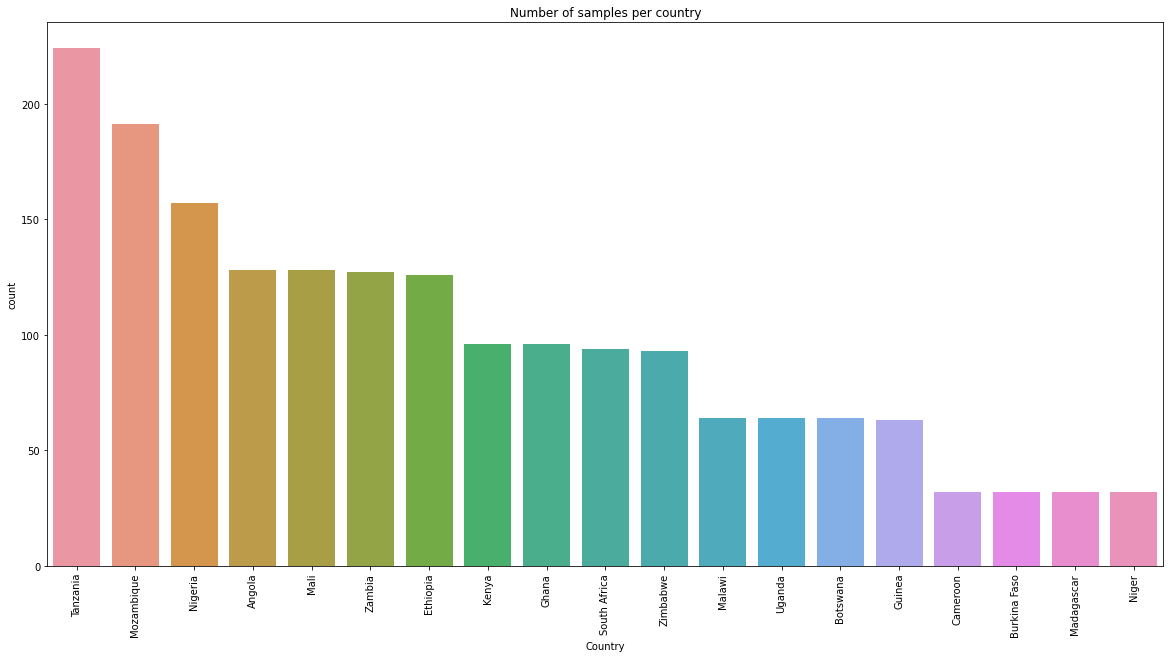

In [105]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
c = sb.countplot(data=PPAL_ELT_DF, 
                 x='Country',
                 order = PPAL_ELT_DF['Country'].value_counts().index).set_title('Number of samples per country')

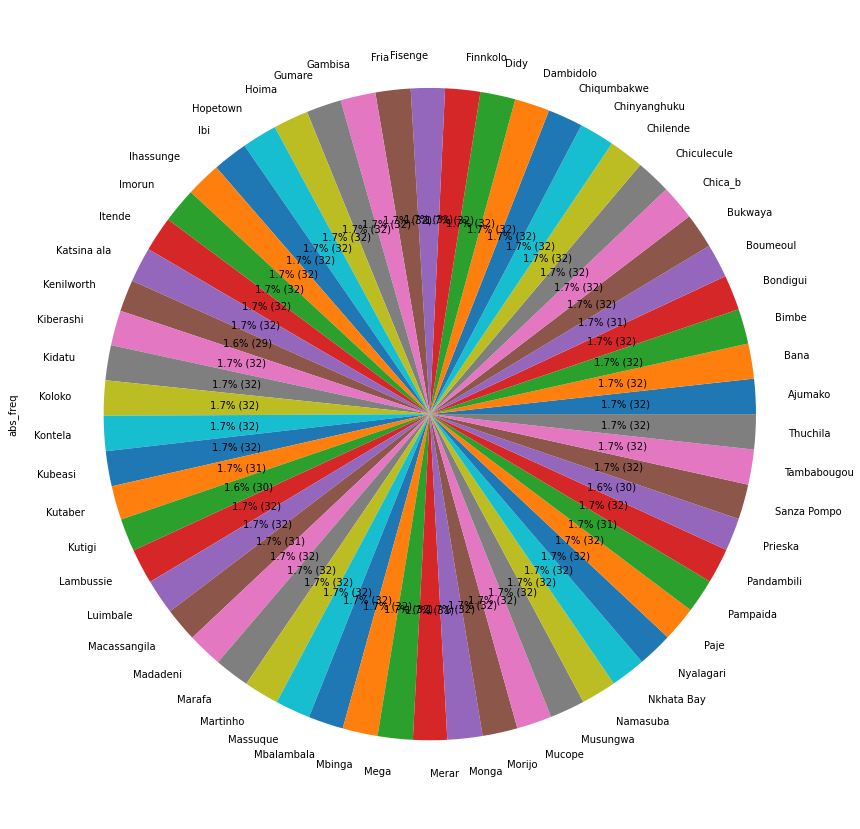

In [109]:
ELT_freqs = (
    PPAL_ELT_DF[['Country','Site']]
    .groupby(by='Site').count()
    .rename(columns={'Country':'abs_freq'})
)

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(gen)})"


ELT_freqs['abs_freq'].plot(kind='pie',
            fontsize=10,
            figsize=(25, 15),
            autopct=autopct_fun(ELT_freqs['abs_freq']),
            legend = False
            )
plt.show()



In [113]:
# Variación de las medidas. Máximo y mínimo.

print(PPAL_ELT_DF['Acidified nitrogen'].min(), PPAL_ELT_DF['Acidified nitrogen'].max())

print(PPAL_ELT_DF['M3 P'].min(), PPAL_ELT_DF['M3 P'].max())

print(PPAL_ELT_DF['M3 K'].min(), PPAL_ELT_DF['M3 K'].max())

print(PPAL_ELT_DF['Acidified carbon'].min(), PPAL_ELT_DF['Acidified carbon'].max())

print(PPAL_ELT_DF['PH'].min(), PPAL_ELT_DF['PH'].max())

0.0 0.681324899
0.001 396.0
0.001 5047.0
0.0 10.93421984
3.61 9.86


In [ ]:
# Frecuencias absolutas

In [140]:
rangesN = [
    (0.0, 0.05, 'a: <0.05%'),
    (0.05, 0.2, 'b: 0.05% - 0.2%'),
    (0.2, 0.3, 'c: 0.2% - 0.3%'),
    (0.3, 0.5, 'd: 0.3% - 0.5%'),
    (0.5, 0.8, 'e: 0.5% - 0.8%')
]


rangesP = [
    (0.0, 9, 'a: <9 ppm'),
    (9, 18, 'b: 9 - 18 ppm'),
    (18, 37, 'c: 18 - 37 ppm'),
    (37, 108, 'd: 37 - 108 ppm'),
    (108, 400, 'e: >108 ppm')
]


rangesK = [
    (0.0, 30, 'a: <30 ppm'),
    (30, 100, 'b: 30 - 100 ppm'),
    (100, 160, 'c: 100 - 160 ppm'),
    (160, 350, 'd: 160 - 350 ppm'),
    (350, 5050, 'e: >350 ppm')
]


rangesCO = [
    (0.0, 0.5, 'a: <0.5%'),
    (0.5, 1.9, 'b: 0.5 - 1.9%'),
    (1.9, 2.8, 'c: 1.9 - 2.8%'),
    (2.8, 5, 'd: 2.8 - 5%'),
    (5, 11, 'e: >5%')
]


rangesPH = [
    (0.0, 5.0, 'a: <5'),
    (5.0, 6.6, 'b: 5 - 6.6'),
    (6.6, 7.5, 'c: 6.6 - 7.5'),
    (7.5, 9, 'd: 7.5 - 9'),
    (9, 11, 'e: >9')
]

In [141]:
def assign_rangeN(x):
    for r in rangesN:
        if x >= r[0] and x <= r[1]:
            return r[2]
    return 'f: NaN'

def assign_rangeP(x):
    for r in rangesP:
        if x >= r[0] and x <= r[1]:
            return r[2]
    return 'f: NaN'

def assign_rangeK(x):
    for r in rangesK:
        if x >= r[0] and x <= r[1]:
            return r[2]
    return 'f: NaN'

def assign_rangeCO(x):
    for r in rangesCO:
        if x >= r[0] and x <= r[1]:
            return r[2]
    return 'f: NaN'

def assign_rangePH(x):
    for r in rangesPH:
        if x >= r[0] and x <= r[1]:
            return r[2]
    return 'f: NaN'

In [142]:
PPAL_ELT_DF['Acidified_nitrogen.range'] = PPAL_ELT_DF['Acidified nitrogen'].apply(assign_rangeN)

PPAL_ELT_DF['M3_P.range'] = PPAL_ELT_DF['M3 P'].apply(assign_rangeP)

PPAL_ELT_DF['M3_K.range'] = PPAL_ELT_DF['M3 K'].apply(assign_rangeK)

PPAL_ELT_DF['Acidified_carbon.range'] = PPAL_ELT_DF['Acidified carbon'].apply(assign_rangeCO)

PPAL_ELT_DF['PH.range'] = PPAL_ELT_DF['PH'].apply(assign_rangePH)

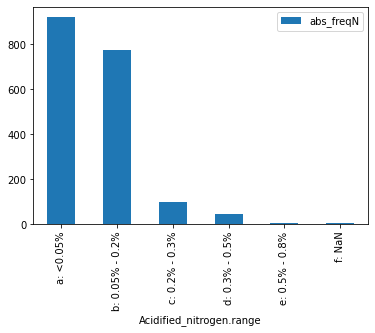

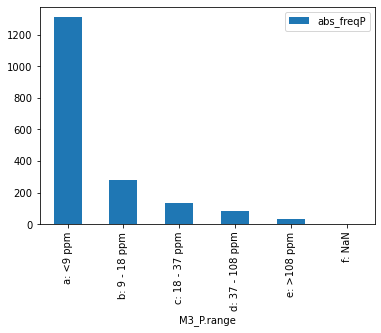

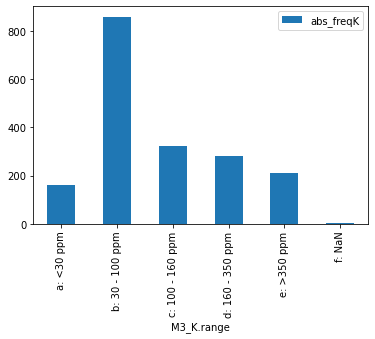

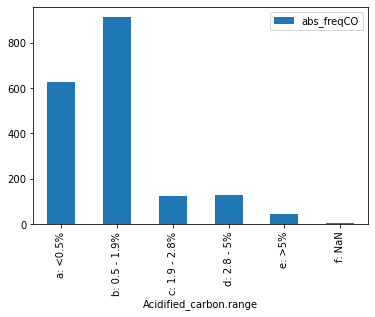

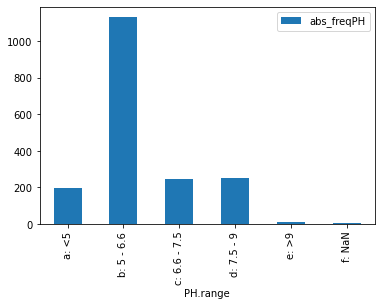

In [152]:
# Gráficas de barras 

(
    PPAL_ELT_DF[['Acidified_nitrogen.range','Country']]
    .groupby(by='Acidified_nitrogen.range')
    .count()
    .rename(columns={'Country':'abs_freqN'})
    .sort_index()
    .plot.bar()
)
plt.show()


(
    PPAL_ELT_DF[['M3_P.range','Country']]
    .groupby(by='M3_P.range')
    .count()
    .rename(columns={'Country':'abs_freqP'})
    .sort_index()
    .plot.bar()
)
plt.show()


(
    PPAL_ELT_DF[['M3_K.range','Country']]
    .groupby(by='M3_K.range')
    .count()
    .rename(columns={'Country':'abs_freqK'})
    .sort_index()
    .plot.bar()
)
plt.show()


(
    PPAL_ELT_DF[['Acidified_carbon.range','Country']]
    .groupby(by='Acidified_carbon.range')
    .count()
    .rename(columns={'Country':'abs_freqCO'})
    .sort_index()
    .plot.bar()
)
plt.show()


(
    PPAL_ELT_DF[['PH.range','Country']]
    .groupby(by='PH.range')
    .count()
    .rename(columns={'Country':'abs_freqPH'})
    .sort_index()
    .plot.bar()
)
plt.show()

In [ ]:
# Histogramas

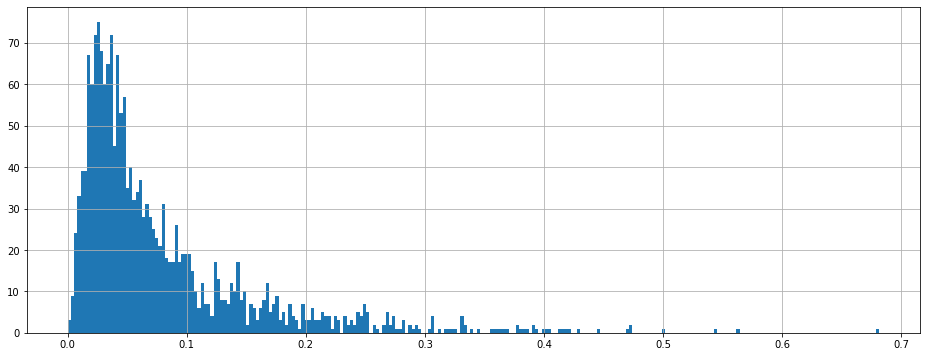

In [149]:
PPAL_ELT_DF['Acidified nitrogen'].hist(bins=250, figsize=(16, 6))
plt.show()

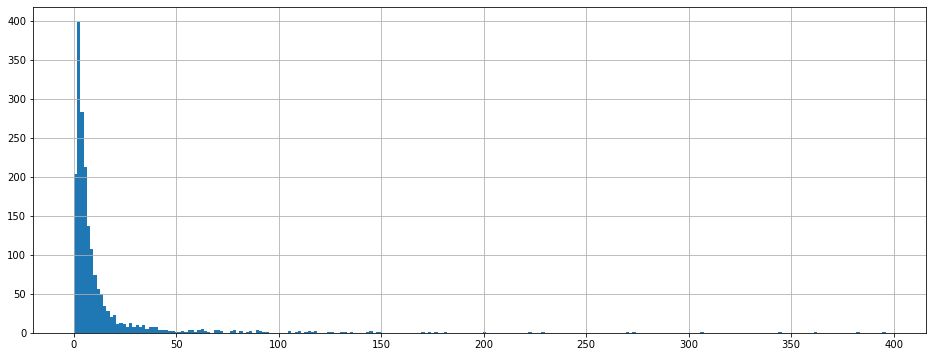

In [150]:
PPAL_ELT_DF['M3 P'].hist(bins=250, figsize=(16, 6))
plt.show()

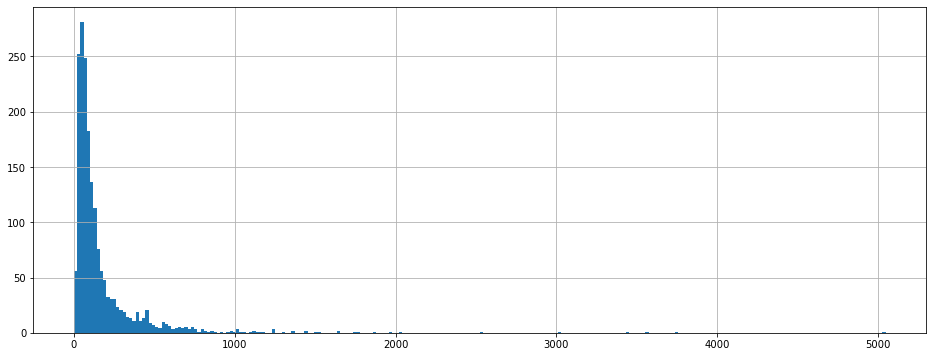

In [151]:
PPAL_ELT_DF['M3 K'].hist(bins=250, figsize=(16, 6))
plt.show()

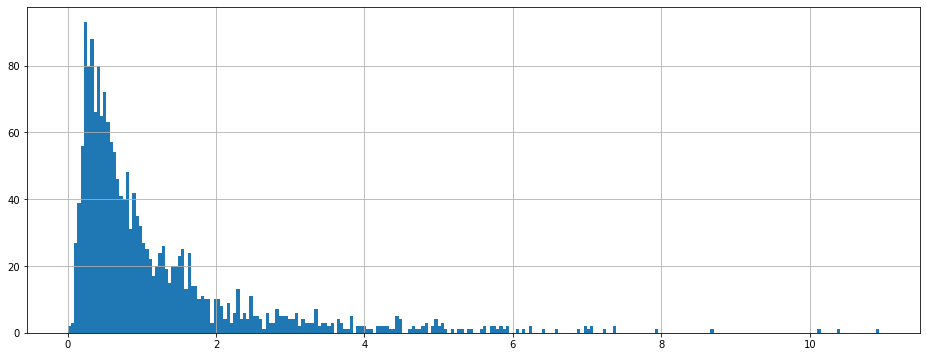

In [153]:
PPAL_ELT_DF['Acidified carbon'].hist(bins=250, figsize=(16, 6))
plt.show()

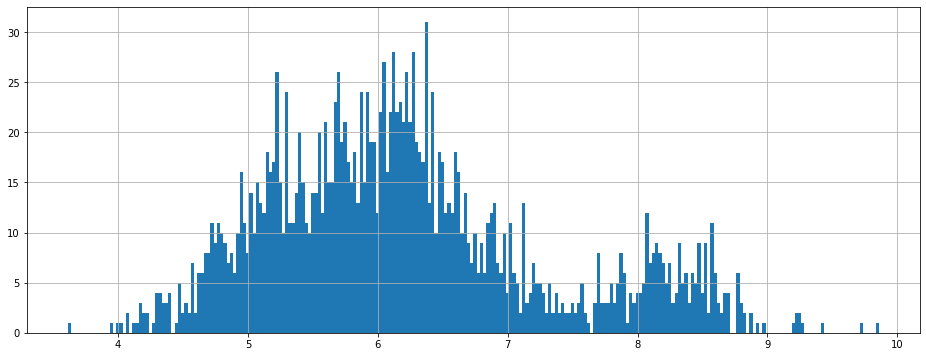

In [154]:
PPAL_ELT_DF['PH'].hist(bins=250, figsize=(16, 6))
plt.show()

In [ ]:
# Mapa de Kepler (solo aristas)

In [168]:
!pip install wheels
!pip install pipwin

!pipwin install numpy
!pipwin install pandas
!pipwin install shapely
!pipwin install gdal
!pipwin install fiona
!pipwin install pyproj
!pipwin install six
!pipwin install rtree
!pipwin install geopandas

ERROR: Could not find a version that satisfies the requirement wheels
ERROR: No matching distribution found for wheels


  Created wheel for pipwin: filename=pipwin-0.5.2-py2.py3-none-any.whl size=8776 sha256=4dca6c327a01c68ef7988c13e93f1632fa30aba845c2c3e2dcfb995aa7ac8f14
  Stored in directory: c:\users\miche\appdata\local\pip\cache\wheels\f4\a8\76\372879a40d2d4dd7de23efd867ed37112687429b8d0dda4545
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=50eb5e5cb22872acc128611e1bac0c0b2741f5a250c6f31f02062a9cbc747c1a
  Stored in directory: c:\users\miche\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25998 sha256=ba5e716c79e9d54e195782ad7b56149789262277b7fe892592d522dd885c905b
  Stored in directory: c:\users\miche\appdata\local\pip\cache\wheels\d5\88\34\ccb5bb40eb3178a134eb293e6c363928c5bcfba0b91031db76
Successfully built pipwin docopt pyjsparser
Building cache. Hang on . . .

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\miche\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

Traceback (most recent call last):
  File "c:\users\miche\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\miche\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\miche\anaconda3\Scripts\pipwin.exe\__main__.py", line 7, in <module>
  File "c:\users\miche\anaconda3\lib\site-packages\pipwin\command.py", line 103, in main
    cache.install(package)
  File "c:\users\miche\anaconda3\lib\site-packages\pipwin\pipwin.py", line 301, in install
    subprocess.check_call([executable, "-m", "pip", "install", wheel_file])
  File "c:\users\miche\anaconda3\lib\subprocess.py", line 364, in check_call
    raise CalledProcessError(retcode, cmd)
subp

Package `pandas` found in cache

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\miche\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

Traceback (most recent call last):
  File "c:\users\miche\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\miche\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\miche\anaconda3\Scripts\pipwin.exe\__main__.py", line 7, in <module>
  File "c:\users\miche\anaconda3\lib\site-packages\pipwin\command.py", line 103, in main
    cache.install(package)
  File "c:\users\miche\anaconda3\lib\site-packages\pipwin\pipwin.py", line 301, in install
    subprocess.check_call([executable, "-m", "pip", "install", wheel_file])
  File "c:\users\miche\anaconda3\lib\subprocess.py", line 364, in check_call
    raise CalledProcessError(retcode, cmd)
subprocess.Cal


https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/pandas-1.4.1-cp38-cp38-win_amd64.whl
pandas-1.4.1-cp38-cp38-win_amd64.whl
[*] 0 bytes / 9.7 MB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 9.7 MB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 9.7 MB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 9.7 MB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 9.7 MB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 9.7 MB @ 0 bytes/s [------------------] [0.0%, 0s left]    

Package `shapely` found in cache
https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/Shapely-1.8.1.post1-cp38-cp38-win_amd64.whl
Shapely-1.8.1.post1-cp38-cp38-win_amd64.whl
[*] 0 bytes / 965 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 965 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 965 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 965 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 965 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 965 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   

Package `gdal` found in cache
https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/GDAL-3.4.2-cp38-cp38-win_amd64.whl
GDAL-3.4.2-cp38-cp38-win_amd64.whl
[*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.4 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 8 kB / 24.4 MB @ 7 kB/s [------------------] [0.0%, 0s left]  [*] 8 kB / 24.4 MB @ 7 kB/s [------------------] [0.0%, 0s left] 

Package `fiona` found in cache
https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/Fiona-1.8.21-cp38-cp38-win_amd64.whl
Fiona-1.8.21-cp38-cp38-win_amd64.whl
[*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 542 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 8 kB / 542 kB @ 9 kB/s [------------------] [1.5%, 0s left]   [*] 8 kB / 542 kB @ 8 kB/s [------------------] [1.5%, 0s left]   [*] 40 kB / 542 kB @ 36 kB/s [#-----------------] [7.4%, 0s left]   [*] 104 kB / 542 kB @ 87 kB/s [###---------------] [19.2%, 0s left]   

Package `six` found in cache
https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/six-1.16.0-py3-none-any.whl
six-1.16.0-py3-none-any.whl
[*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


Package `rtree` found in cache
https://download.lfd.uci.edu/pythonlibs/x6hvwk7i/Rtree-0.9.7-cp38-cp38-win_amd64.whl
Rtree-0.9.7-cp38-cp38-win_amd64.whl
[*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 322 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 8 kB / 322 kB @ 9 kB/s [------------------] [2.5%, 0s left]   [*] 8 kB / 322 kB @ 8 kB/s [------------------] [2.5%, 0s left]   [*] 40 kB / 322 kB @ 36 kB/s [##----------------] [12.4%, 0s left]  [*] 88 kB / 322 kB @ 73 kB/s [####--------------] [27.3%, 0s left]  [*] 

In [169]:
! pip install keplergl

  Using cached keplergl-0.3.2-py2.py3-none-any.whl
  Using cached traittypes-0.2.1-py2.py3-none-any.whl (8.6 kB)


In [170]:
from keplergl import KeplerGl

In [177]:
thr = 30
cols = ['Site', 'Country', 'Latitude', 'Longitude', 'Acidified nitrogen', 'M3 P', 'M3 K', 'Acidified carbon', 'PH']
PPAL_ELT_DF_map = PPAL_ELT_DF

KeplerGl(height=800, width=1000).save_to_html(data=\
            {'edges':PPAL_ELT_DF_map[cols]\
             .copy()}, file_name=f'elements_edges.html', center_map=True)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to elements_edges.html!


In [198]:
from keplergl import KeplerGl

w1 = keplergl.KeplerGl(height=800, width=1000, data=\
            {'edges':PPAL_ELT_DF_map[cols]\
             .copy()}, center_map=True) 

w1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'edges':               Site       Country   Latitude  Longitude  Acidified nitrogen  \
0       …

In [196]:
# Consultar detalle de las capas en el archivo del mapa:

w1.save_to_html()

Map saved to keplergl_map.html!
